# AI-Powered Loan Eligibility Dataset Analysis

### Objective
This notebook explores the Loan Eligibility dataset, performs data cleaning, visualization, SQL queries, and builds a predictive ML model to classify loan eligibility.

### Steps Covered:
- Load data
- Explore & clean
- Visualize patterns
- Run SQL queries inside Colab
- Train ML Model for loan eligibility


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("/content/loan_eligibility_dataset.csv")
df.head()


,customer_id,monthly_income,loan_amount_requested,existing_emi,credit_score,document_verified,voice_verified,document_extracted_income,discrepancy_flag,debt_to_income_ratio,loan_approved
0,C0001,136958,361955,8330,815,1,0,138540,0,0.06,1
1,C0002,146932,80447,24495,696,0,0,151379,0,0.17,0
2,C0003,118694,178046,19678,405,0,1,110482,0,0.17,0
3,C0004,134879,789290,34962,384,1,1,138831,0,0.26,0
4,C0005,125268,1615070,73685,513,1,0,117317,0,0.59,0


In [3]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                2000 non-null   object 
 1   monthly_income             2000 non-null   int64  
 2   loan_amount_requested      2000 non-null   int64  
 3   existing_emi               2000 non-null   int64  
 4   credit_score               2000 non-null   int64  
 5   document_verified          2000 non-null   int64  
 6   voice_verified             2000 non-null   int64  
 7   document_extracted_income  2000 non-null   int64  
 8   discrepancy_flag           2000 non-null   int64  
 9   debt_to_income_ratio       2000 non-null   float64
 10  loan_approved              2000 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 172.0+ KB


,monthly_income,loan_amount_requested,existing_emi,credit_score,document_verified,voice_verified,document_extracted_income,discrepancy_flag,debt_to_income_ratio,loan_approved
count,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.0,2000.000000,2000.00000
mean,83485.304500,1.017669e+06,24799.392000,597.485000,0.791500,0.707500,83448.4320,0.0,0.295405,0.19850
std,39391.180838,5.640123e+05,20000.796506,171.260071,0.406338,0.455024,39610.2631,0.0,0.172192,0.39897
min,15126.000000,5.015900e+04,1.000000,300.000000,0.000000,0.000000,13689.0000,0.0,0.000000,0.00000
25%,48923.000000,5.188268e+05,8587.500000,450.000000,1.000000,0.000000,49052.0000,0.0,0.140000,0.00000
50%,83772.500000,9.994625e+05,19153.500000,595.500000,1.000000,1.000000,83885.0000,0.0,0.290000,0.00000
75%,118368.500000,1.517131e+06,36496.500000,743.000000,1.000000,1.000000,118010.7500,0.0,0.440000,0.00000
max,149869.000000,1.999897e+06,86711.000000,899.000000,1.000000,1.000000,161370.0000,0.0,0.600000,1.00000


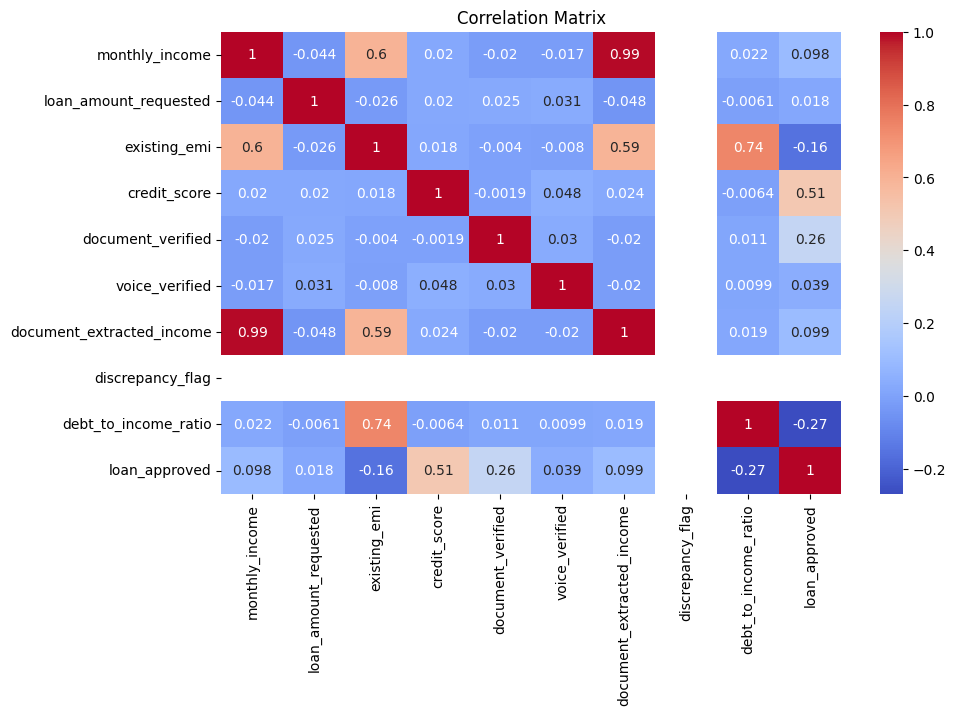

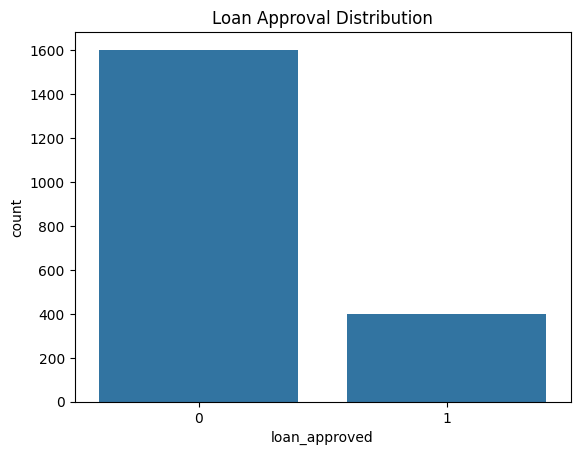

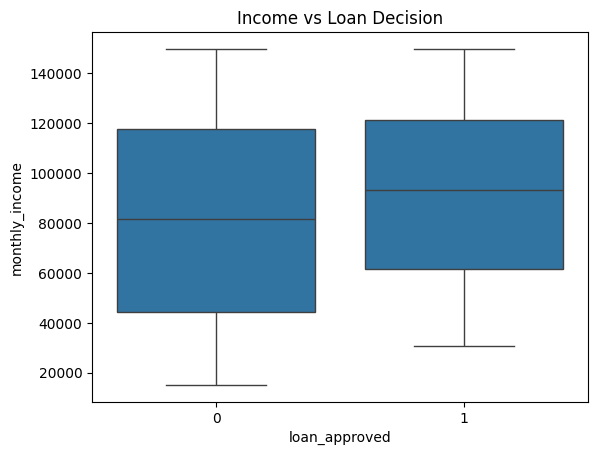

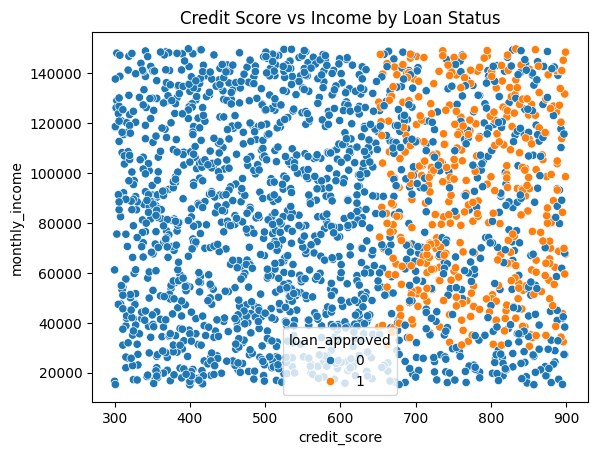

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

sns.countplot(x="loan_approved", data=df)
plt.title("Loan Approval Distribution")
plt.show()

sns.boxplot(x="loan_approved", y="monthly_income", data=df)
plt.title("Income vs Loan Decision")
plt.show()

sns.scatterplot(x="credit_score", y="monthly_income", hue="loan_approved", data=df)
plt.title("Credit Score vs Income by Loan Status")
plt.show()

In [7]:
import sqlite3

conn = sqlite3.connect("loan.db")
df.to_sql("loan_data", conn, if_exists="replace", index=False)
print("SQL table created ✅")


SQL table created ✅


In [8]:
# Count total applicants
print(pd.read_sql("SELECT COUNT(*) FROM loan_data", conn))

# Avg income by loan approval
print(pd.read_sql("""
SELECT loan_approved, AVG(monthly_income) AS avg_income
FROM loan_data GROUP BY loan_approved
""", conn))

# High income applicants but loan rejected (interesting case)
print(pd.read_sql("""
SELECT customer_id, monthly_income, credit_score
FROM loan_data
WHERE loan_approved = 0
ORDER BY monthly_income DESC LIMIT 5
""", conn))

# Check impact of credit score
print(pd.read_sql("""
SELECT credit_score, AVG(loan_approved) AS approval_rate
FROM loan_data GROUP BY credit_score ORDER BY credit_score DESC
""", conn))


   COUNT(*)
0      2000
   loan_approved    avg_income
0              0  81567.643793
1              1  91228.403023
  customer_id  monthly_income  credit_score
0       C0868          149869           398
1       C0688          149668           535
2       C0083          149633           525
3       C1128          149502           414
4       C1368          149461           415
     credit_score  approval_rate
0             899       1.000000
1             898       0.400000
2             897       0.333333
3             896       0.666667
4             895       0.500000
..            ...            ...
578           304       0.000000
579           303       0.000000
580           302       0.000000
581           301       0.000000
582           300       0.000000

[583 rows x 2 columns]


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(["customer_id", "loan_approved"], axis=1)
y = df["loan_approved"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       0.99      0.99      0.99        73

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



### Key Insights

- Dataset contains 2000 loan applicants.
- Credit score & income strongly influence approval.
- High discrepancy cases reduce approval probability.
- Built ML model (Random Forest) to predict approvals.
- SQL queries used to analyze income and approval behavior.
